In [10]:
using DataFrames
using CairoMakie
using MLJ
using RDatasets

In [2]:
# Data load and partition
iris = RDatasets.dataset("datasets", "iris");
y, X = unpack(iris, ==(:Species), _->true, rng=1010);

In [3]:
NeuralNetworkClassifier = @load NeuralNetworkClassifier
clf = NeuralNetworkClassifier()

import MLJFlux ✔


┌ Info: For silent loading, specify `verbosity=0`. 
└ @ Main C:\Users\julio\.julia\packages\MLJModels\tMgLW\src\loading.jl:168


NeuralNetworkClassifier(
    builder = Short(
            n_hidden = 0,
            dropout = 0.5,
            σ = NNlib.σ),
    finaliser = NNlib.softmax,
    optimiser = Flux.Optimise.ADAM(0.001, (0.9, 0.999), IdDict{Any, Any}()),
    loss = Flux.Losses.crossentropy,
    epochs = 10,
    batch_size = 1,
    lambda = 0.0,
    alpha = 0.0,
    rng = Random._GLOBAL_RNG(),
    optimiser_changes_trigger_retraining = false,
    acceleration = CPU1{Nothing}(nothing))

In [4]:
mach = machine(clf, X, y) |> fit!

┌ Info: Training Machine{NeuralNetworkClassifier{Short,…},…}.
└ @ MLJBase C:\Users\julio\.julia\packages\MLJBase\eTz4T\src\machines.jl:464
Optimising neural net: 18%[====>                    ]  ETA: 0:01:22

Optimising neural net:100%[=========================] Time: 0:00:21


Machine{NeuralNetworkClassifier{Short,…},…} trained 1 time; caches data
  model: MLJFlux.NeuralNetworkClassifier{MLJFlux.Short, typeof(NNlib.softmax), Flux.Optimise.ADAM, typeof(Flux.Losses.crossentropy)}
  args: 
    1:	Source @099 ⏎ `Table{AbstractVector{Continuous}}`
    2:	Source @546 ⏎ `AbstractVector{Multiclass{3}}`


In [5]:
training_loss = cross_entropy(predict(mach, X), y) |> mean

0.8634633207877702

In [7]:
# Increasing learning rate and adding iterations:
clf.optimiser.eta = clf.optimiser.eta * 2
clf.epochs = clf.epochs + 5
fit!(mach)

┌ Info: Updating Machine{NeuralNetworkClassifier{Short,…},…}.
└ @ MLJBase C:\Users\julio\.julia\packages\MLJBase\eTz4T\src\machines.jl:465
Optimising neural net: 33%[========>                ]  ETA: 0:00:00

Optimising neural net: 50%[============>            ]  ETA: 0:00:00

Optimising neural net: 67%[================>        ]  ETA: 0:00:00

Optimising neural net: 83%[====================>    ]  ETA: 0:00:00

Optimising neural net:100%[=========================] Time: 0:00:00


Machine{NeuralNetworkClassifier{Short,…},…} trained 3 times; caches data
  model: MLJFlux.NeuralNetworkClassifier{MLJFlux.Short, typeof(NNlib.softmax), Flux.Optimise.ADAM, typeof(Flux.Losses.crossentropy)}
  args: 
    1:	Source @099 ⏎ `Table{AbstractVector{Continuous}}`
    2:	Source @546 ⏎ `AbstractVector{Multiclass{3}}`


In [8]:
training_loss = cross_entropy(predict(mach, X), y) |> mean

0.575753564417278

In [9]:
# Accessing the chain
fitted_params(mach).chain

Chain(
  Chain(
    Dense(4, 3, σ),                     # 15 parameters
    Dropout(0.5),
    Dense(3, 3),                        # 12 parameters
  ),
  NNlib.softmax,
)                   # Total: 4 arrays, 27 parameters, 476 bytes.

In [11]:
r = range(clf, :epochs, lower=1, upper=200, scale=:log10)
curve = learning_curve(clf, X, y,
                       range=r,
                       resampling=Holdout(fraction_train=0.7),
                       measure=cross_entropy)

┌ Info: Training Machine{ProbabilisticTunedModel{Grid,…},…}.
└ @ MLJBase C:\Users\julio\.julia\packages\MLJBase\eTz4T\src\machines.jl:464
┌ Info: Attempting to evaluate 25 models.
└ @ MLJTuning C:\Users\julio\.julia\packages\MLJTuning\Al9yX\src\tuned_models.jl:680
Evaluating over 25 metamodels:   8%[==>                      ]  ETA: 0:01:24

Evaluating over 25 metamodels:  16%[====>                    ]  ETA: 0:00:39

Evaluating over 25 metamodels:  20%[=====>                   ]  ETA: 0:00:30

Evaluating over 25 metamodels:  24%[======>                  ]  ETA: 0:00:24

Evaluating over 25 metamodels:  28%[=======>                 ]  ETA: 0:00:19

Evaluating over 25 metamodels:  32%[========>                ]  ETA: 0:00:16

Evaluating over 25 metamodels:  36%[=========>               ]  ETA: 0:00:14

Evaluating over 25 metamodels:  40%[==========>              ]  ETA: 0:00:12

Evaluating over 25 metamodels:  44%[===========>             ]  ETA: 0:00:10

Evaluating over 25 metamodels:  48%[============>            ]  ETA: 0:00:09

Evaluating over 25 metamodels:  52%[=============>           ]  ETA: 0:00:08

Evaluating over 25 metamodels:  56%[==============>          ]  ETA: 0:00:07

Evaluating over 25 metamodels:  60%[===============>         ]  ETA: 0:00:06

Evaluating over 25 metamodels:  64%[================>        ]  ETA: 0:00:05

Evaluating over 25 metamodels:  68%[=================>       ]  ETA: 0:00:04

Evaluating over 25 metamodels:  72%[==================>      ]  ETA: 0:00:04

Evaluating over 25 metamodels:  76%[===================>     ]  ETA: 0:00:03

Evaluating over 25 metamodels:  80%[====================>    ]  ETA: 0:00:03

Evaluating over 25 metamodels:  84%[=====================>   ]  ETA: 0:00:02

Evaluating over 25 metamodels:  88%[======================>  ]  ETA: 0:00:02

Evaluating over 25 metamodels:  92%[=======================> ]  ETA: 0:00:01

Evaluating over 25 metamodels:  96%[========================>]  ETA: 0:00:01

Evaluating over 25 metamodels: 100%[=========================] Time: 0:00:14


(parameter_name = "epochs",
 parameter_scale = :log10,
 parameter_values = [1, 2, 3, 4, 5, 6, 7, 9, 11, 13  …  39, 46, 56, 67, 80, 96, 116, 139, 167, 200],
 measurements = [1.0732042464770675, 0.9560546185265093, 0.8931201141347888, 0.8569926727674114, 0.8175551279851511, 0.7874434184114242, 0.7559256573290086, 0.7095126262554708, 0.6642507094621094, 0.6367339420580553  …  0.46387594734239174, 0.44064523624331436, 0.4083814776509058, 0.3711289817311052, 0.35180049187945595, 0.32210918943742833, 0.30749090631878523, 0.29241222187387444, 0.2864625712077378, 0.27177616819755473],)

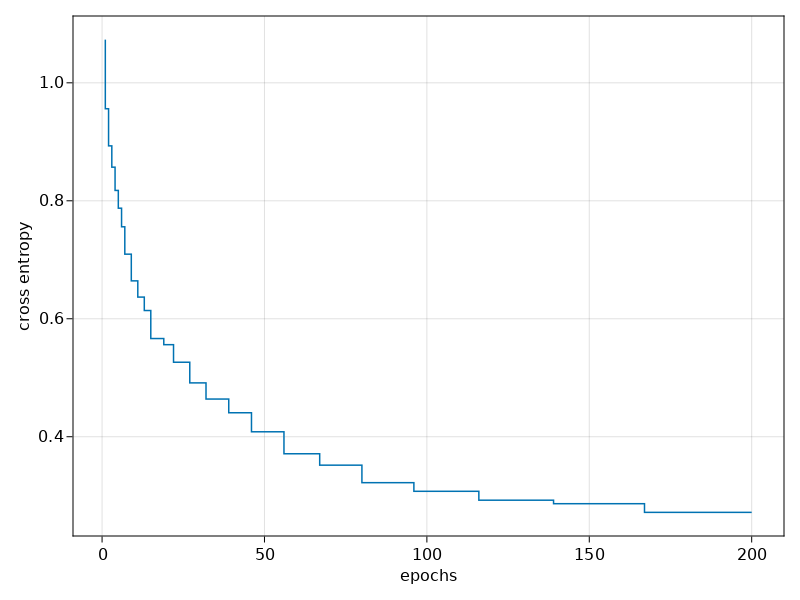

In [14]:
fig = Figure()
ax = Axis(fig[1, 1], xlabel="epochs", ylabel="cross entropy")
stairs!(ax, curve.parameter_values, curve.measurements)
fig